<a href="https://colab.research.google.com/github/irfan117/AICoverbykemiri/blob/main/identifikasiRas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files


In [1]:
from google.colab import files
uploaded = files.upload()


Saving model_identifikasi_ras.h5 to model_identifikasi_ras.h5


In [2]:

# Memverifikasi file yang diunggah
!ls

# Memastikan TensorFlow versi kompatibel diinstal (ganti dengan versi yang sesuai)
# !pip install tensorflow==2.x.x

# Memuat model
from tensorflow.keras.models import load_model

try:
    model = load_model('model_identifikasi_ras.h5')
    print("Model berhasil dimuat.")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat model: {e}")

model_identifikasi_ras.h5  sample_data
Model berhasil dimuat.


In [3]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))  # Sesuaikan dengan ukuran input model Anda
    image = image / 255.0  # Normalisasi jika model Anda memerlukannya
    image = np.expand_dims(image, axis=0)  # Menambahkan dimensi batch
    return image


In [4]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))  # Sesuaikan dengan ukuran input model Anda
    image = image / 255.0  # Normalisasi jika model Anda memerlukannya
    image = np.expand_dims(image, axis=0)  # Menambahkan dimensi batch
    return image


In [5]:
def predict_race(image_path, model):
    image = load_and_preprocess_image(image_path)
    predictions = model.predict(image)
    predicted_race = np.argmax(predictions, axis=1)[0]
    return predicted_race


In [16]:
race_dict = {0: 'Asian', 1: 'Africa', 2: 'Eropa', 3: 'Asia Timur', 4:'Astronesia'}

In [17]:
def show_image_with_prediction(image_path, predicted_race):
    image = cv2.imread(image_path)
    cv2.putText(image, f'Predicted Race: {predicted_race}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2_imshow(image)


Saving kmeng.jpeg to kmeng (4).jpeg
1/1 [==============================] - 0s 162ms/step


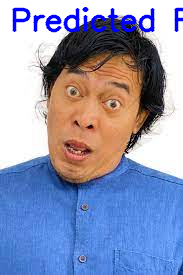

In [18]:
# Mengunggah gambar
uploaded = files.upload()

# Menyimpan path ke gambar yang diunggah
for image_name in uploaded.keys():
    image_path = image_name

# Prediksi ras
predicted_race_index = predict_race(image_path, model)
predicted_race = race_dict[predicted_race_index]

# Tampilkan gambar dan hasil prediksi
show_image_with_prediction(image_path, predicted_race)



Saving photo_1_2024-05-17_16-44-01.jpg to photo_1_2024-05-17_16-44-01.jpg
1/1 [==============================] - 0s 56ms/step


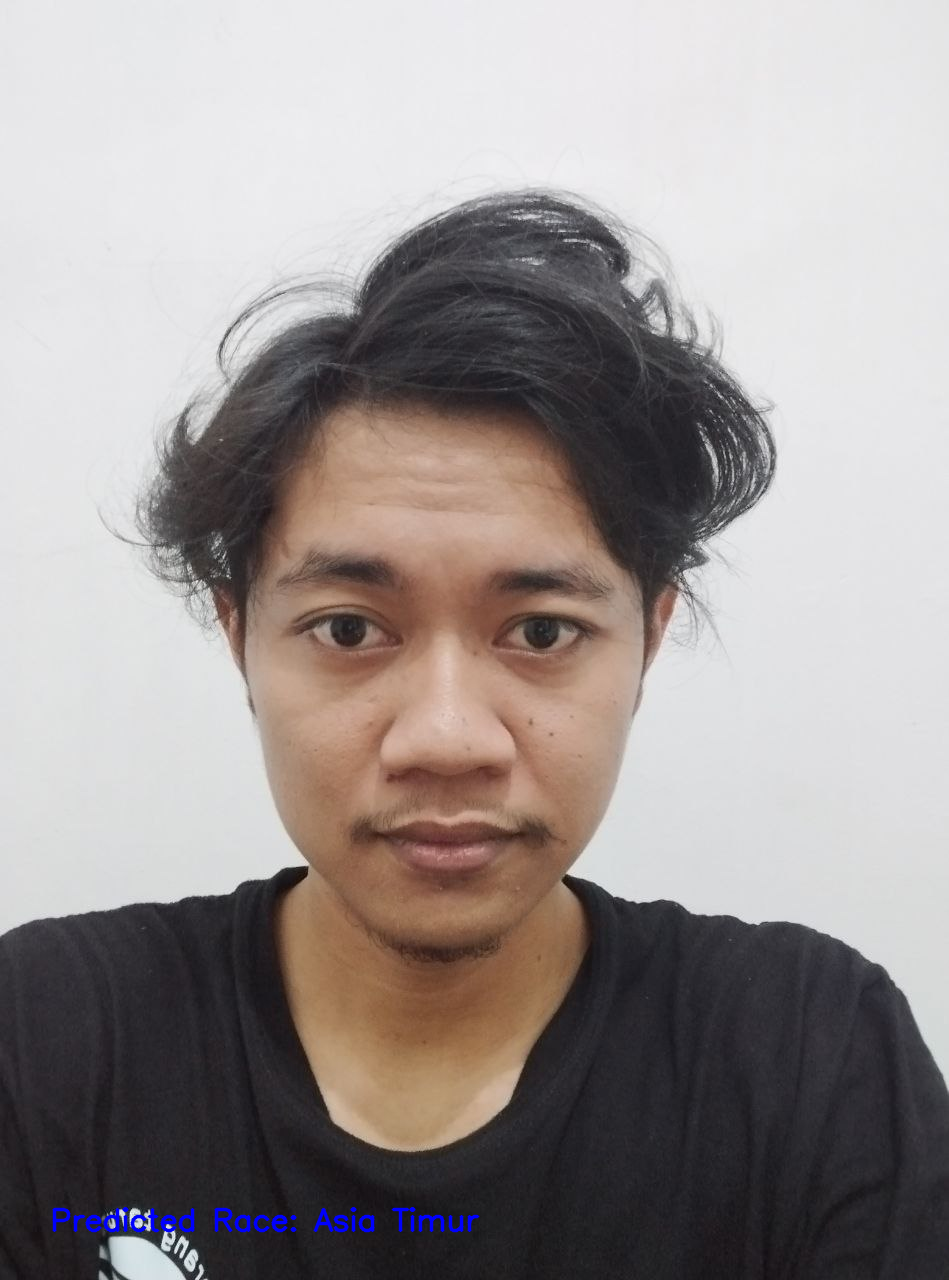

In [25]:
def show_image_with_prediction(image_path, predicted_race_index):
    image = cv2.imread(image_path)
    predicted_race = race_dict[predicted_race_index]  # Mendapatkan nama ras dari kamus

    # Menentukan posisi teks berdasarkan orientasi gambar
    height, width, _ = image.shape
    if height > width:  # Potret
        org = (50, height - 50)  # Koordinat teks pada potret
    else:  # Lanskap atau persegi
        org = (50, 50)  # Koordinat teks pada lanskap atau persegi

    # Menambahkan teks ke gambar
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255, 0, 0)
    thickness = 2
    cv2.putText(image, f'Predicted Race: {predicted_race}', org, font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(image)

# Mengunggah gambar
uploaded = files.upload()

# Mendapatkan path ke gambar yang diunggah
for image_name in uploaded.keys():
    image_path = image_name

# Prediksi ras
predicted_race_index = predict_race(image_path, model)

# Menampilkan gambar dan hasil prediksi
show_image_with_prediction(image_path, predicted_race_index)

In [13]:
from google.colab.patches import cv2_imshow

In [11]:
import numpy as np

In [9]:
!pip install opencv-python-headless
import cv2
